In [21]:
import numpy as np
from StringIO import StringIO
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import urllib2,base64
import cPickle as pickle
from collections import Counter
from collections import defaultdict
from collections import OrderedDict
from __future__ import division
from vincenty import vincenty
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import geoplotlib as gp
import scipy as sp
import gdal 
from gdalconst import * 
import datetime
import math
import operator
import re
import os
import os.path
import requests, time
import urllib, json
import csv
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
tls.set_credentials_file(username='ShawnHou', api_key='OohmqCJaPfb6p6xo4pDF')
from geoplotlib.utils import BoundingBox
from sklearn import neighbors, datasets,linear_model,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import LeavePLabelOut
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import euclidean_distances
from pylab import *
from scipy import stats
from sklearn.neighbors import DistanceMetric
from urllib2 import urlopen, Request
from pprint import pprint
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from scipy.spatial import distance
from collections import defaultdict
from operator import itemgetter
from pushover import init, Client
from scipy.spatial import KDTree
from calendar import monthrange
from sklearn import metrics
import tarfile

#for parallel processing
from ipyparallel import Client

from weatherML import *

%matplotlib inline

## Data processing

In [2]:
temp_stations = pd.read_csv(os.getcwd()+'\\data\\data option one\\weather_station_list.csv',skipinitialspace=True)
temp_stations['GHCND']=temp_stations.GHCND.str.strip()
temp_stations=temp_stations[temp_stations.GHCND.str.contains("US")] ##Discard non US stations
temp_stations_clean=temp_stations[np.abs(temp_stations.LON-temp_stations.LON.mean())<=(5*temp_stations.LON.std())] ##discard OUTLIER by location

print "include outliner, size:",temp_stations.shape
print "exclude outliner, size:",temp_stations_clean.shape

include outliner, size: (56918, 6)
exclude outliner, size: (56911, 6)


### NOAA GHCND DATA
The five core elements are:

           PRCP = Precipitation (tenths of mm)
   	   SNOW = Snowfall (mm)
	   SNWD = Snow depth (mm)
           TMAX = Maximum temperature (tenths of degrees C)
           TMIN = Minimum temperature (tenths of degrees C)
	   
	   The other elements are:
	   
	   ACMC = Average cloudiness midnight to midnight from 30-second 
	          ceilometer data (percent)
	   ACMH = Average cloudiness midnight to midnight from 
	          manual observations (percent)
           ACSC = Average cloudiness sunrise to sunset from 30-second 
	          ceilometer data (percent)
	   ACSH = Average cloudiness sunrise to sunset from manual 
	          observations (percent)
           AWDR = Average daily wind direction (degrees)
	   AWND = Average daily wind speed (tenths of meters per second)
	   DAEV = Number of days included in the multiday evaporation
	          total (MDEV)
	   DAPR = Number of days included in the multiday precipiation 
	          total (MDPR)
           DASF = Number of days included in the multiday snowfall 
	          total (MDSF)		  
	   DATN = Number of days included in the multiday minimum temperature 
	         (MDTN)
	   DATX = Number of days included in the multiday maximum temperature 
	          (MDTX)
           DAWM = Number of days included in the multiday wind movement
	          (MDWM)
	   DWPR = Number of days with non-zero precipitation included in 
	          multiday precipitation total (MDPR)
	   EVAP = Evaporation of water from evaporation pan (tenths of mm)
	   FMTM = Time of fastest mile or fastest 1-minute wind 
	          (hours and minutes, i.e., HHMM)
	   FRGB = Base of frozen ground layer (cm)
	   FRGT = Top of frozen ground layer (cm)
	   FRTH = Thickness of frozen ground layer (cm)
	   GAHT = Difference between river and gauge height (cm)
	   MDEV = Multiday evaporation total (tenths of mm; use with DAEV)
	   MDPR = Multiday precipitation total (tenths of mm; use with DAPR and 
	          DWPR, if available)
	   MDSF = Multiday snowfall total 
	   MDTN = Multiday minimum temperature (tenths of degrees C; use with 
	          DATN)
	   MDTX = Multiday maximum temperature (tenths of degress C; use with 
	          DATX)
	   MDWM = Multiday wind movement (km)
           MNPN = Daily minimum temperature of water in an evaporation pan 
	         (tenths of degrees C)
           MXPN = Daily maximum temperature of water in an evaporation pan 
	         (tenths of degrees C)
	   PGTM = Peak gust time (hours and minutes, i.e., HHMM)
	   PSUN = Daily percent of possible sunshine (percent)
	   SN*# = Minimum soil temperature (tenths of degrees C)
	          where * corresponds to a code
	          for ground cover and # corresponds to a code for soil 
		  depth.  
		  
		  Ground cover codes include the following:
		  0 = unknown
		  1 = grass
		  2 = fallow
		  3 = bare ground
		  4 = brome grass
		  5 = sod
		  6 = straw multch
		  7 = grass muck
		  8 = bare muck
		  
		  Depth codes include the following:
		  1 = 5 cm
		  2 = 10 cm
		  3 = 20 cm
		  4 = 50 cm
		  5 = 100 cm
		  6 = 150 cm
		  7 = 180 cm
		  
	   SX*# = Maximum soil temperature (tenths of degrees C) 
	          where * corresponds to a code for ground cover 
		  and # corresponds to a code for soil depth. 
		  See SN*# for ground cover and depth codes. 
           TAVG = Average temperature (tenths of degrees C)
	          [Note that TAVG from source 'S' corresponds
		   to an average for the period ending at
		   2400 UTC rather than local midnight]
           THIC = Thickness of ice on water (tenths of mm)	
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
	   TSUN = Daily total sunshine (minutes)
	   WDF1 = Direction of fastest 1-minute wind (degrees)
	   WDF2 = Direction of fastest 2-minute wind (degrees)
	   WDF5 = Direction of fastest 5-second wind (degrees)
	   WDFG = Direction of peak wind gust (degrees)
	   WDFI = Direction of highest instantaneous wind (degrees)
	   WDFM = Fastest mile wind direction (degrees)
           WDMV = 24-hour wind movement (km)	   
           WESD = Water equivalent of snow on the ground (tenths of mm)
	   WESF = Water equivalent of snowfall (tenths of mm)
	   WSF1 = Fastest 1-minute wind speed (tenths of meters per second)
	   WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
	   WSF5 = Fastest 5-second wind speed (tenths of meters per second)
	   WSFG = Peak gust wind speed (tenths of meters per second)
	   WSFI = Highest instantaneous wind speed (tenths of meters per second)
	   WSFM = Fastest mile wind speed (tenths of meters per second)
	   WT** = Weather Type where ** has one of the following values:
	   
                  01 = Fog, ice fog, or freezing fog (may include heavy fog)
                  02 = Heavy fog or heaving freezing fog (not always 
		       distinquished from fog)
                  03 = Thunder
                  04 = Ice pellets, sleet, snow pellets, or small hail 
                  05 = Hail (may include small hail)
                  06 = Glaze or rime 
                  07 = Dust, volcanic ash, blowing dust, blowing sand, or 
		       blowing obstruction
                  08 = Smoke or haze 
                  09 = Blowing or drifting snow
                  10 = Tornado, waterspout, or funnel cloud 
                  11 = High or damaging winds
                  12 = Blowing spray
                  13 = Mist
                  14 = Drizzle
                  15 = Freezing drizzle 
                  16 = Rain (may include freezing rain, drizzle, and
		       freezing drizzle) 
                  17 = Freezing rain 
                  18 = Snow, snow pellets, snow grains, or ice crystals
                  19 = Unknown source of precipitation 
                  21 = Ground fog 
                  22 = Ice fog or freezing fog
		  
            WV** = Weather in the Vicinity where ** has one of the following 
	           values:
		   
		   01 = Fog, ice fog, or freezing fog (may include heavy fog)
		   03 = Thunder
		   07 = Ash, dust, sand, or other blowing obstruction
		   18 = Snow or ice crystals
		   20 = Rain or snow shower

In [3]:
used_columns = [0,1,2,3,7]
dtypes = ['object']+['object']+['object']+[float, 'object']
data_columns = ['GHCND', 'DATE', 'ATTRIBUTE', 'VALUE', 'TIME']

year_file=os.getcwd()+'\\data\\data option one\\1980.csv.gz'
year_df = pd.read_csv(year_file, compression='gzip', header=None,usecols = used_columns,
                              dtype=dict(zip(used_columns, dtypes)),sep=',').rename(columns=dict(zip(used_columns, data_columns)))
metrics=year_df['ATTRIBUTE'].unique().tolist()
print "All different weather metrics: ",metrics 

All different weather metrics:  ['TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'ACMH', 'ACSH', 'PGTM', 'PSUN', 'TSUN', 'WDFG', 'WDFM', 'WSFG', 'WSFM', 'WT01', 'WT16', 'WDF1', 'WSF1', 'WESD', 'TOBS', 'EVAP', 'WDMV', 'WT08', 'MNPN', 'MXPN', 'WT06', 'WT02', 'WT18', 'MDPR', 'WT04', 'DAPR', 'WT09', 'WT03', 'MDSF', 'DWPR', 'WT05', 'DAEV', 'DAWM', 'MDEV', 'MDWM', 'DASF', 'WT14', 'WT11', 'WT07', 'WT22', 'DATX', 'MDTX', 'DATN', 'MDTN']


In [4]:
wanted_metrics=['PRCP','SNOW','SNWD','TMAX','TMIN']

#### (Server starts first) Start a cluster for parallel computation of the performance of the ML models.  (Cluster profile: weatherprofile, engine:4)

In [9]:
cluster = Client(profile='weatherprofile')
lb_view=cluster.load_balanced_view()
print "Cluster Profile: ",cluster.profile
print "Cluster Engines: ",len(lb_view)

Cluster Profile:  weatherprofile
Cluster Engines:  4


#### Start testing PRISM model with data from GHCND

In [5]:
temp_stations_clean=pd.read_csv('data\\data option one\\cleaned_weather_station_list_withCounty.csv',skipinitialspace=True)

In [6]:
temp_stations_clean.dtypes

GHCND           object
LAT            float64
LON            float64
ELEV           float64
ST              object
NAME            object
COUNTY_CODE    float64
COUNTY_NAME     object
BLOCK_CODE     float64
dtype: object

In [7]:
#Get all stations on the contiguious 
temp_stations_clean['ST']=temp_stations_clean['ST'].str.strip()
temp_stations_cont= temp_stations_clean.loc[~temp_stations_clean.index.isin(temp_stations_clean[temp_stations_clean['ST'].isin(['AK','PR','PW','HI','UM','PI'])].index)]

In [25]:
def getTestWeatherNormalPRIMS(locs_df, img, date, n, M, Regressor):  
    band = img.GetRasterBand(1)
    nodatavalue = band.GetNoDataValue()
    ncol = img.RasterXSize
    nrow = img.RasterYSize
    geotransform = img.GetGeoTransform()
    originX = geotransform[0]
    b=geotransform[2]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    d=geotransform[4]
    pixelHeight = geotransform[5]
    data = band.ReadAsArray()
    data[data == nodatavalue] = np.nan
    data_ind_array= np.argwhere(~np.isnan(data)).astype(float)
    #print data_ind_array[:,0]
    #print (data.shape[0]-1)-data_ind_array[:,0]
    data_ind_array[:,0]=data_ind_array[:,0]*pixelHeight+originY
    data_ind_array[:,1]=data_ind_array[:,1]*pixelWidth+originX
    data_value_array= data[~np.isnan(data)].astype(float)
    training_df=pd.DataFrame({'LAT':data_ind_array[:,0],'LON':data_ind_array[:,1],'ELEV':np.zeros(len(data_ind_array[:,1]))})
    cart_serie=training_df.apply(sph2cart, axis=1)
    training_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= training_df.index)
    if Regressor=="KNN": 
        neigh = KNeighborsRegressor(n_neighbors=n, weights='distance',metric='euclidean',p=2) #for spherical dis,using haversine. to include elevation, use the customized function     

        #print "Year: "+str(YEAR)+" ( with Altitude), Cross validation score: ",cross_val_score(neigh,date_station_metric_df[['x','y','z']] ,date_station_metric_df['VALUE'], cv=10).mean()   
    if Regressor=="Radius": 
        neigh = RadiusNeighborsRegressor(radius=n, weights='distance',metric='euclidean',p=2)

    neigh.fit(training_df[['x','y','z']].as_matrix(),data_value_array)
    try:
        score=neigh.score(locs_df[['x','y','z']],locs_df['VALUE']/10)
    except ZeroDivisionError:
        print "Error (Date:"+date+" no nearby grids to some sample stations in Radius mode!!!"
        score=-1
    print "fitted a : ", Regressor, " Score: ",score
    #cross_val_score(neigh,training_df[['x','y','z']] ,data_value_array, cv=10).mean()
    return score

In [35]:
def getWeatherNormalPRIMS(locs_df, img, date, n, M, Regressor):  
    band = img.GetRasterBand(1)
    nodatavalue = band.GetNoDataValue()
    ncol = img.RasterXSize
    nrow = img.RasterYSize
    geotransform = img.GetGeoTransform()
    originX = geotransform[0]
    b=geotransform[2]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    d=geotransform[4]
    pixelHeight = geotransform[5]
    data = band.ReadAsArray()
    data[data == nodatavalue] = np.nan
    data_ind_array= np.argwhere(~np.isnan(data)).astype(float)
    #print data_ind_array[:,0]
    #print (data.shape[0]-1)-data_ind_array[:,0]
    data_ind_array[:,0]=data_ind_array[:,0]*pixelHeight+originY
    data_ind_array[:,1]=data_ind_array[:,1]*pixelWidth+originX
    data_value_array= data[~np.isnan(data)].astype(float)
    training_df=pd.DataFrame({'LAT':data_ind_array[:,0],'LON':data_ind_array[:,1],'ELEV':np.zeros(len(data_ind_array[:,1]))})
    cart_serie=training_df.apply(sph2cart, axis=1)
    training_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= training_df.index)
    if Regressor=="KNN": 
        neigh = KNeighborsRegressor(n_neighbors=n, weights='distance',metric='haversine') #for spherical dis,using haversine. to include elevation, use the customized function     

        #print "Year: "+str(YEAR)+" ( with Altitude), Cross validation score: ",cross_val_score(neigh,date_station_metric_df[['x','y','z']] ,date_station_metric_df['VALUE'], cv=10).mean()   
    if Regressor=="Radius": 
        neigh = RadiusNeighborsRegressor(radius=n, weights='distance',metric='haversine')

    neigh.fit(training_df[['LAT','LON']].as_matrix(),data_value_array)
    try:
        scores=neigh.predict(locs_df[['LAT','LON']])
    except ZeroDivisionError:
        print "Error (Date:"+date+" no nearby grids to some sample stations in Radius mode!!!"
        scores=-1
    print "fitted a : ", Regressor, " Score: ",score
    #cross_val_score(neigh,training_df[['x','y','z']] ,data_value_array, cv=10).mean()
    return scores

In [26]:
used_columns = [1,2,3,4,5,6]
dtypes = ['object']+['object']+[float]+[float, float, float]
data_columns =["GHCND","DATE","VALUE","LAT","LON","ELEV"]
year='2016'
norm='TMAX'
year_station_metric_df=pd.read_csv("data\\daily GHCND dataframes\\"+year+"_"+norm+".csv",skipinitialspace=True,header=None,usecols = used_columns,
                          dtype=dict(zip(used_columns, dtypes)),sep=',').rename(columns=dict(zip(used_columns, data_columns)))

date_range=[d.strftime('%Y%m%d') for d in pd.date_range('20160101','20161231')]
performance_dict=defaultdict(list)

#parallel processing here
#def processPerformancePRISM(date):
#import pandas as pd
#from weatherML import getTestWeatherNormalPRIMS,sph2cart
#    date_station_metric_df=year_station_metric_df[(year_station_metric_df['DATE']==date) & (year_station_metric_df['VALUE']<1000) & (year_station_metric_df['VALUE']>-999)]
#    date_station_metric_df=date_station_metric_df[date_station_metric_df['GHCND'].isin(temp_stations_cont['GHCND'])]
#    date_station_sample_df=date_station_metric_df.sample(n=500)
#    cart_serie=date_station_sample_df.apply(sph2cart, axis=1)
#    date_station_sample_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= date_station_sample_df.index)
#    print "Date: "+date+" Norm: "+norm+" Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ "
#    knn_perf=getTestWeatherNormalPRIMS(date_station_sample_df, date, 5, norm, 'KNN')
#    rad_perf=getTestWeatherNormalPRIMS(date_station_sample_df, date, 50, norm, 'Radius')
#    return {'date':date, 'KNN':knn_pref ,'Radius':rad_perf }


#Parallel Processing
#lb_view.push(dict(year_station_metric_df=year_station_metric_df)) # send bar
#with cluster[:].sync_imports(): # your 'view' variable 
    

#cluster[:].push(dict(year_station_metric_df=year_station_metric_df,
#                     temp_stations_cont=temp_stations_cont,
#                     norm=norm))
#result= lb_view.map(processPerformancePRISM, date_range, block=True )


for date in date_range:
    date_station_metric_df=year_station_metric_df[(year_station_metric_df['DATE']==date) & (year_station_metric_df['VALUE']<1000) & (year_station_metric_df['VALUE']>-999)]
    date_station_metric_df=date_station_metric_df[date_station_metric_df['GHCND'].isin(temp_stations_cont['GHCND'])]
    date_station_sample_df=date_station_metric_df.sample(n=500)
    cart_serie=date_station_sample_df.apply(sph2cart, axis=1)
    date_station_sample_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= date_station_sample_df.index)
    print "Date: "+date+" Norm: "+norm+" Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ "
    
    year=date[:4]
    filename=r'/vsizip/C:\WorkingGround\Master Thesis\data\daily PRISM dataframes\PRISM_'+norm.lower()+'_stable_4kmD1_'+year+'0101_'+year+'1231_bil.zip\PRISM_'+norm.lower()+'_stable_4kmD1_'+date+'_bil.bil'
    
    gdal.GetDriverByName('EHdr').Register()
    img = gdal.Open(filename, GA_ReadOnly) 
    #print type(img)
    
    knn_perf=getTestWeatherNormalPRIMS(date_station_sample_df,img, date, 5, norm, 'KNN')
    rad_perf=getTestWeatherNormalPRIMS(date_station_sample_df,img, date, 50, norm, 'Radius')
    performance_dict[year].append((knn_perf,rad_perf))


Date: 20160101 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.86862779666
fitted a :  Radius  Score:  0.852459964268
Date: 20160102 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.84111390546
fitted a :  Radius  Score:  0.829416614738
Date: 20160103 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.834694739627
fitted a :  Radius  Score:  0.79606478523
Date: 20160104 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.77910242757
fitted a :  Radius  Score:  0.747362994355
Date: 20160105 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.861191991405
fitted a :  Radius  Score:  0.827735454882
Date: 20160106 Norm

fitted a :  Radius  Score:  0.924888482942
Date: 20160212 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.957073844875
fitted a :  Radius  Score:  0.945763530745
Date: 20160213 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.918012544568
fitted a :  Radius  Score:  0.902522421117
Date: 20160214 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.941411865462
fitted a :  Radius  Score:  0.924381775289
Date: 20160215 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.906751964706
fitted a :  Radius  Score:  0.893939556849
Date: 20160216 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.884964685328
fitted a :  Rad

fitted a :  KNN  Score:  0.801274062321
fitted a :  Radius  Score:  0.79223318625
Date: 20160325 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.849527433302
fitted a :  Radius  Score:  0.812954569629
Date: 20160326 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.795460502475
fitted a :  Radius  Score:  0.754946387102
Date: 20160327 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.769941356566
fitted a :  Radius  Score:  0.757202949407
Date: 20160328 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.709278590755
fitted a :  Radius  Score:  0.662742791234
Date: 20160329 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN 

fitted a :  KNN  Score:  0.748980939151
fitted a :  Radius  Score:  0.670099608343
Date: 20160506 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.676822530943
fitted a :  Radius  Score:  0.603360477738
Date: 20160507 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.6645731145
fitted a :  Radius  Score:  0.595787448459
Date: 20160508 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.778868896616
fitted a :  Radius  Score:  0.72431961897
Date: 20160509 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.561283585383
fitted a :  Radius  Score:  0.533387483337
Date: 20160510 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  S

fitted a :  KNN  Score:  0.889477127894
fitted a :  Radius  Score:  0.849478349148
Date: 20160617 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.77056658673
fitted a :  Radius  Score:  0.723171385107
Date: 20160618 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.80200527577
fitted a :  Radius  Score:  0.73443465527
Date: 20160619 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.715511610082
fitted a :  Radius  Score:  0.63100663882
Date: 20160620 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.669855790057
fitted a :  Radius  Score:  0.608617733492
Date: 20160621 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Sc

fitted a :  KNN  Score:  0.82511351492
fitted a :  Radius  Score:  0.689418090285
Date: 20160729 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.82708719875
fitted a :  Radius  Score:  0.694993566517
Date: 20160730 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.712945539606
fitted a :  Radius  Score:  0.604730218036
Date: 20160731 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.831376006469
fitted a :  Radius  Score:  0.746010854394
Date: 20160801 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.845545769376
fitted a :  Radius  Score:  0.742191077888
Date: 20160802 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  

fitted a :  KNN  Score:  0.882524363368
fitted a :  Radius  Score:  0.82964818161
Date: 20160909 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.864508206236
fitted a :  Radius  Score:  0.785884494438
Date: 20160910 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.621696017321
fitted a :  Radius  Score:  0.56766685241
Date: 20160911 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.715364677292
fitted a :  Radius  Score:  0.635571379344
Date: 20160912 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.65479282572
fitted a :  Radius  Score:  0.577024080779
Date: 20160913 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  S

fitted a :  KNN  Score:  0.857554958499
fitted a :  Radius  Score:  0.846463964753
Date: 20161021 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.798522222478
fitted a :  Radius  Score:  0.780968364244
Date: 20161022 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.865503352651
fitted a :  Radius  Score:  0.811574118797
Date: 20161023 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.802565997986
fitted a :  Radius  Score:  0.756123837698
Date: 20161024 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.822169884969
fitted a :  Radius  Score:  0.77077758591
Date: 20161025 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN 

fitted a :  KNN  Score:  0.909700724438
fitted a :  Radius  Score:  0.889708009599
Date: 20161202 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.924074369212
fitted a :  Radius  Score:  0.891960846077
Date: 20161203 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.833848769592
fitted a :  Radius  Score:  0.816365752394
Date: 20161204 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.807829462284
fitted a :  Radius  Score:  0.795414673053
Date: 20161205 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN  Score:  0.830302016319
fitted a :  Radius  Score:  0.790847070488
Date: 20161206 Norm: TMAX Random select 500 stations from GHCND data to test PRISM model (R-square error) ------ 
fitted a :  KNN

In [30]:
with open('performance2016_TMAX.csv','wb') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['KNN','Radius'])
    for row in performance_dict['2016']:
        csv_out.writerow(row)

## TEST CODE BELOW!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [227]:
def getWeatherNormalGHCND(locs_df, date, n, M, Regressor):  
    print "Regressor:",Regressor
    #print "Radius of earth:",6371
    used_columns = [1,2,3,4,5,6]
    dtypes = ['object']+['object']+[float]+[float, float, float]
    data_columns =["GHCND","DATE","VALUE","LAT","LON","ELEV"]
    estimate_list=list()
    file_name=str(date)[:4]+"_"+M

    year_station_metric_df=pd.read_csv("data\\daily GHCND dataframes\\"+file_name+".csv",skipinitialspace=True,header=None,usecols = used_columns,
                          dtype=dict(zip(used_columns, dtypes)),sep=',').rename(columns=dict(zip(used_columns, data_columns)))
    date_station_metric_df=year_station_metric_df[(year_station_metric_df['DATE']==date) & (year_station_metric_df['VALUE']<1000) & (year_station_metric_df['VALUE']>-999)]
    cart_serie=date_station_metric_df.apply(sph2cart, axis=1)
    date_station_metric_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= date_station_metric_df.index)

    if Regressor=="KNN": ##USING !10
        neigh = KNeighborsRegressor(n_neighbors=n, weights='distance',metric='euclidean') #for spherical dis,using haversine. to include elevation, use the customized function     

        #print "Year: "+str(YEAR)+" ( with Altitude), Cross validation score: ",cross_val_score(neigh,date_station_metric_df[['x','y','z']] ,date_station_metric_df['VALUE'], cv=10).mean()   
    if Regressor=="Radius": ##USING HOLDOUT METHOD
        neigh = RadiusNeighborsRegressor(radius=n, weights='distance',metric='euclidean')

    neigh.fit(date_station_metric_df[['x','y','z']],date_station_metric_df['VALUE'])
    #accuracy_list.append(cross_val_score(neigh,date_station_metric_df[['x','y','z']] ,date_station_metric_df['VALUE'], cv=10).mean())
    cart_serie=locs_df.apply(sph2cart, axis=1)
    locs_df[['x','y','z']] = pd.DataFrame(cart_serie.values.tolist(), index= locs_df.index)
    estimate_list.append(neigh.predict( locs_df[['x','y','z']]))
    #print "Date: "+date+" : ",neigh.predict(np.reshape(sph2cart(matric_dict),(1,3)))[0]
    #print "+++++++++++++++++++++++++++++++++++++++++++"
    
    #break
    return estimate_list 

## ------------------------------------------------- Test code below

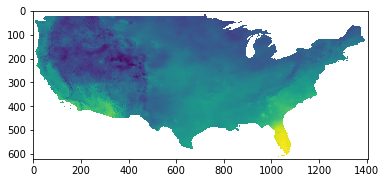

In [133]:
filename=r'/vsizip/C:\WorkingGround\Master Thesis\data\daily PRISM dataframes\PRISM_tmax_stable_4kmD1_20160101_20161231_bil.zip\PRISM_tmax_stable_4kmD1_20160102_bil.bil'
gdal.GetDriverByName('EHdr').Register()
Regressor='Radius'
n=5
img = gdal.Open(filename, GA_ReadOnly) 
band = img.GetRasterBand(1)
nodatavalue = band.GetNoDataValue()
prism_array = band.ReadAsArray().astype(np.float32)
# prism_nodata = prism_band.GetNoDataValue()
prism_array[prism_array == nodatavalue] = np.nan
prism_ds = None
 
plt.imshow(prism_array, cmap='viridis')
plt.show()